In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

In [3]:
def LookupTable(value):
    result = ''
    classes = {
        '0':['Savanna formation','Other non-forest natural formation',
             'Forest formation','Water','Urban infrastructure',
             'Tree plantation','Forest','Other'],
        '1':['Grassland formation','Wetland','Rangeland'],
        '2':['Pasture'],
        '3':['Annual crop','Perennial crop','Semi-perennial crop']
        
    }

    mainClass = {
            '0':'Other',
            '1':'Natural and Semi-natural grass',
            '2':'Seeded grass',
            '3':'Crops and other related agricultural practices',
    }
    
    if value in classes['2']:
        result = mainClass['2']
    elif value in classes['1']:
        result = mainClass['1']
    elif value in classes['0']:
        result = mainClass['0']
    elif value in classes['3']:
        result = mainClass['3']
    
    return result

### Get data from MapBiomes LULC data

In [4]:
#Read dataset from original lulc
originalData = '../datasets/02_Mapbiomes/brazil_lulc_samples_1985_2018_row_wise.csv.gz'

df = pd.read_csv(originalData,sep=',')
df = df.iloc[:,1:]

#Map Fields original data
fields = ['latitude','longitude','dataset_name', 
          'reference_year', 'original_lulc_class',
          'gpw_lulc_class','sample_weight']

#Copy original dataframe lulc
dataMB = df.copy()

#Rename columns from original data
dataMB.rename(columns = {
    'year':'reference_year',
    'lulc_class':'original_lulc_class',
    'sampling_weight':'sample_weight'
},inplace=True)

dataMB['dataset_name'] = originalData
dataMB['gpw_lulc_class'] = dataMB['original_lulc_class'].apply(lambda x: LookupTable(x))
dataMB = dataMB[fields]
dataMB

,latitude,longitude,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight
0,3.080146,-59.983514,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Grassland formation,Natural and Semi-natural grass,157707.894211
1,-0.063239,-60.061398,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Other,Other,333.480062
2,4.667738,-60.879853,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Pasture,Seeded grass,137744.732033
3,4.452682,-60.900604,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Pasture,Seeded grass,140649.430403
4,4.028497,-60.015853,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Savanna formation,Other,140649.430403
...,...,...,...,...,...,...,...
2880811,-6.760988,-50.471703,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Forest formation,Other,97287.536327
2880812,-2.593793,-48.679294,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Forest formation,Other,97287.536327
2880813,-7.730360,-50.997217,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Forest formation,Other,97287.536327
2880814,-7.021589,-50.215683,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Pasture,Seeded grass,97287.536327


In [5]:
dataMB.duplicated().sum()

0

In [6]:
LookupTable('Pasture')

'Seeded grass'

In [7]:
dataMB.original_lulc_class.unique()

array(['Grassland formation', 'Other', 'Pasture', 'Savanna formation',
       'Other non-forest natural formation', 'Forest formation', 'Water',
       'Annual crop', 'Urban infrastructure', 'Tree plantation',
       'Perennial crop', 'Wetland', 'Semi-perennial crop'], dtype=object)

In [8]:
len(dataMB.original_lulc_class.unique())

13

In [9]:
print('Rows:',dataMB.shape[0])

Rows: 2880816


In [10]:
dataMB

,latitude,longitude,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight
0,3.080146,-59.983514,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Grassland formation,Natural and Semi-natural grass,157707.894211
1,-0.063239,-60.061398,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Other,Other,333.480062
2,4.667738,-60.879853,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Pasture,Seeded grass,137744.732033
3,4.452682,-60.900604,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Pasture,Seeded grass,140649.430403
4,4.028497,-60.015853,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,1985,Savanna formation,Other,140649.430403
...,...,...,...,...,...,...,...
2880811,-6.760988,-50.471703,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Forest formation,Other,97287.536327
2880812,-2.593793,-48.679294,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Forest formation,Other,97287.536327
2880813,-7.730360,-50.997217,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Forest formation,Other,97287.536327
2880814,-7.021589,-50.215683,../datasets/02_Mapbiomes/brazil_lulc_samples_1...,2018,Pasture,Seeded grass,97287.536327


<AxesSubplot:>

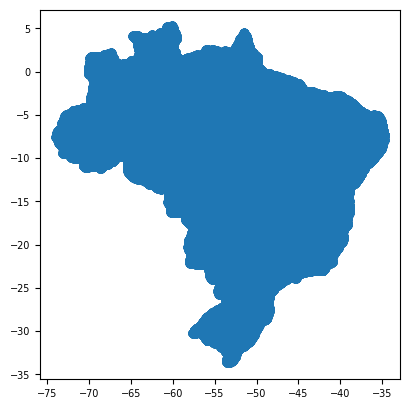

In [11]:
crs = "EPSG:4326"

dataMBGeo = gpd.GeoDataFrame(dataMB, geometry=gpd.points_from_xy(dataMB.longitude, dataMB.latitude),crs=crs)
dataMBGeo.plot()

In [13]:
dataMBGeo['dataset_name'] = 'Mapbiomes'
dataMBGeo['observation'] = ''


In [14]:
dataMBGeo.iloc[:,2:].head(5)

,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,geometry,observation
0,Mapbiomes,1985,Grassland formation,Natural and Semi-natural grass,157707.894211,POINT (-59.98351 3.08015),
1,Mapbiomes,1985,Other,Other,333.480062,POINT (-60.06140 -0.06324),
2,Mapbiomes,1985,Pasture,Seeded grass,137744.732033,POINT (-60.87985 4.66774),
3,Mapbiomes,1985,Pasture,Seeded grass,140649.430403,POINT (-60.90060 4.45268),
4,Mapbiomes,1985,Savanna formation,Other,140649.430403,POINT (-60.01585 4.02850),


In [15]:
srcout = '/media/bernard/Data/LAPIG/Doutorado/Global_Pasture_Watch/datasets/harmonized_databases/02_db_mapbiomes.parquet'
dataMBGeo.iloc[:,2:].to_parquet(srcout)